In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SciServer.SkyServer as SkyServer   # show individual objects and generate thumbnail images through SkyServer

import PrimaryPlates as PriPlates #This is just needed to get the X-Y coordinates

In [2]:
plate = ''
print('Type in plate number and hit enter')
while type(plate) != type(8):
    plate = input()
    try:
        plate = int(plate)
    except:
        print('Make sure that you input the numbers without any spaces')

Type in plate number and hit enter
8248


##### Change the 'origin =  0' to 'origin = -1' if you want to have the origin in the bottom left corner

In [25]:
origin = 0

In [3]:
# plate = 8248


stars, gals = PriPlates.Get_Star_Gal(plate)

In [4]:
#This is just in case you have other data that you want to submit

# stars = pd.read_csv('emergency_stars.csv')
# gals = pd.read_csv('emergency_gals.csv')

In [26]:
gal_num = np.array(np.arange(len(gals)))
np.random.shuffle(gal_num)

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
           'Y', 'Z']
np.random.shuffle(letters)

In [27]:
def plate_plot():
    blue = '#307efb' #color of stars
    green = '#5acc77' #color of galaxies

    holes = None #change this to a number to reduce the number of star holes


    #make a circle
    xc = np.arange(-400, 401)  # don't understand why this is not 400
    yc = np.sqrt(400**2-xc**2)

    #make a tab
    sztab = 50.
    xtab = np.array([-sztab, -sztab, sztab, sztab])
    ytabval = np.sqrt(400**2-xtab**2)
    ytab = ytabval + np.array([0, 40, 40, 0])

    origin_offset = -400*origin

    fig = plt.figure(figsize=(15,15))


    plt.plot(stars['x'][:holes]+origin_offset, stars['y'][:holes]+origin_offset, 'o', c=blue)
    plt.plot(gals['x']+origin_offset, gals['y']+origin_offset, 'o', c=green, markeredgecolor='k', markersize=25)


    for i in gal_num:
        plt.annotate(str(i+1), (gals['x'][i]+origin_offset, gals['y'][i]+origin_offset), fontsize=15, ha='center', va='center', c='k')
    plt.plot(0+origin_offset,0+origin_offset,'ko') 

    plt.plot(xc+origin_offset, yc+origin_offset, c='k')
    plt.plot(xc+origin_offset, -1.*yc+origin_offset, c='k')


    plt.plot(xtab+origin_offset, ytab+origin_offset, c='k')



    ax = plt.gca()
    ax.set_aspect(aspect=1)
    ax.text(xtab[0]+20+origin_offset, ytab[0]+10+origin_offset, plate, fontsize=17)

#     plt.axis('off')  # also removes border

    return fig
    # plt.show()

In [28]:
def gal_multiplot():
    width = 512
    scale = 0.4
    IFU = np.round(gals['ifudsgn'].to_numpy(dtype=int)/100)

    fig = plt.figure(figsize=(15, 15))

    for i in np.arange(len(gal_num)):
#         print(gal_num[i])
        scale = (IFU[gal_num[i]] + 20)/width
        img_g = SkyServer.getJpegImgCutout(ra=gals['ifura'][gal_num[i]],
                                           dec=gals['ifudec'][gal_num[i]], width=width, height=width, scale=scale, opt='')


        plt.subplot(5,4,i+1)
        plt.imshow(img_g)                               # show images in grid
        plt.title(letters[gal_num[i]]+': ['+str(np.round(gals['x'], 2)[gal_num[i]])+', '+str(np.round(gals['y'], 2)[gal_num[i]])+']')

        plt.axis('off')

    return fig


In [29]:
def answer_key():
    fig = plt.figure(figsize=(5, 15))

    for i in gal_num:
    # i = 0
        if i < 9:
            plt.text( -0.1, 1-i/1.5, '  '+str(i+1)+' = '+letters[i], ma='center')
        if i > 8:
            plt.text( -0.1, 1-i/1.5, str(i+1)+' = '+letters[i], ma='center')
    plt.title('Answer Key:')
    plt.xlim(-1,1)
    plt.ylim(-max(gal_num),2)
    plt.axis('off')
    
    return fig

3
4
10
13
9
6
16
12
7
14
5
0
2
11
1
8
15


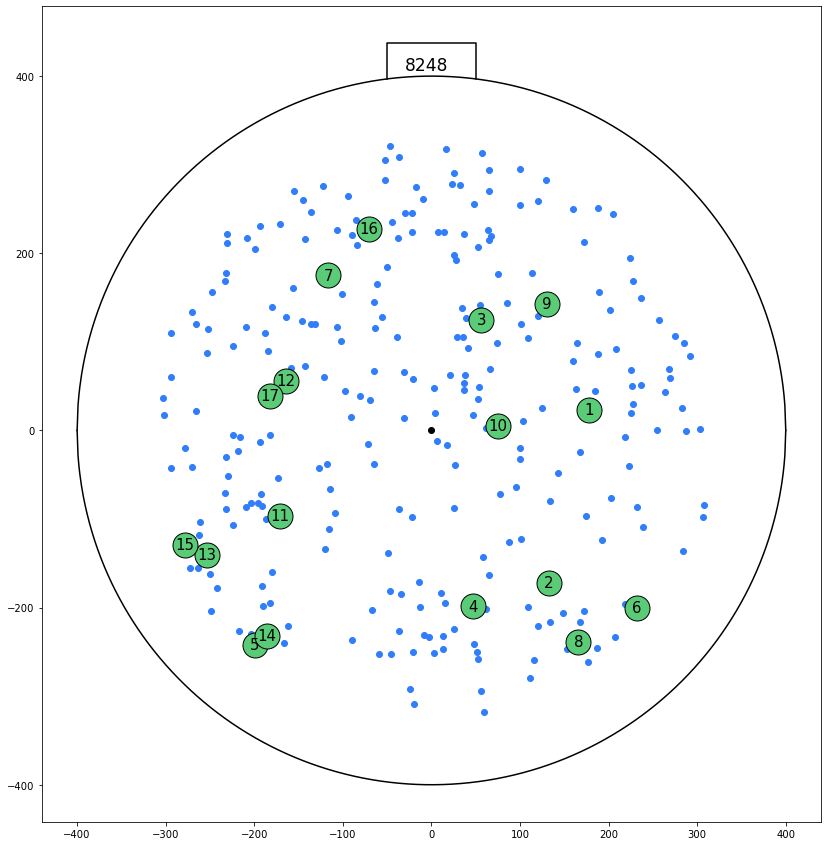

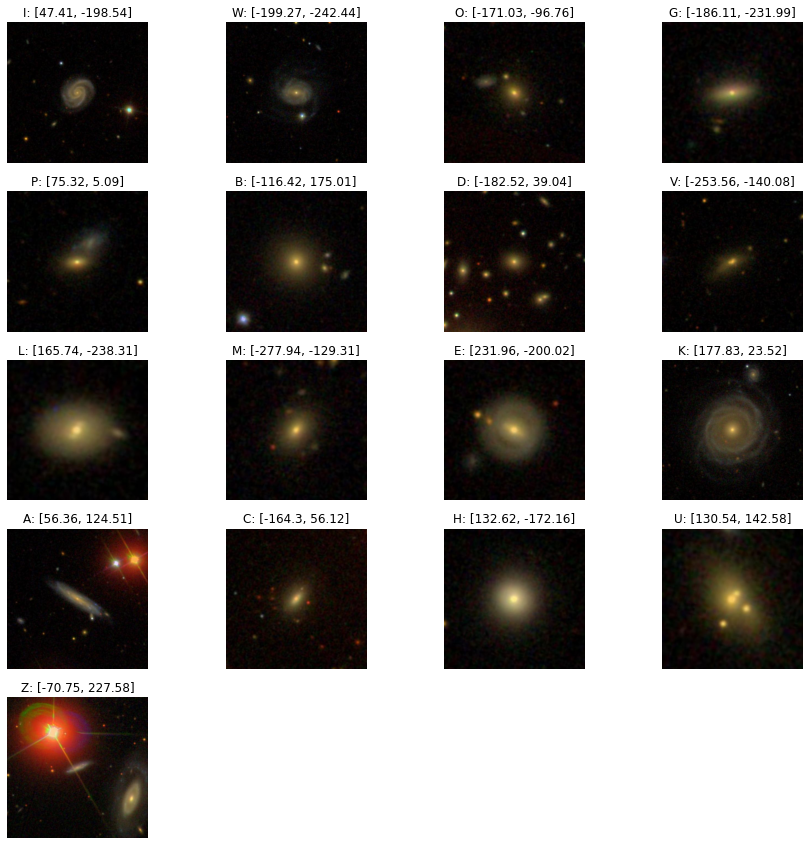

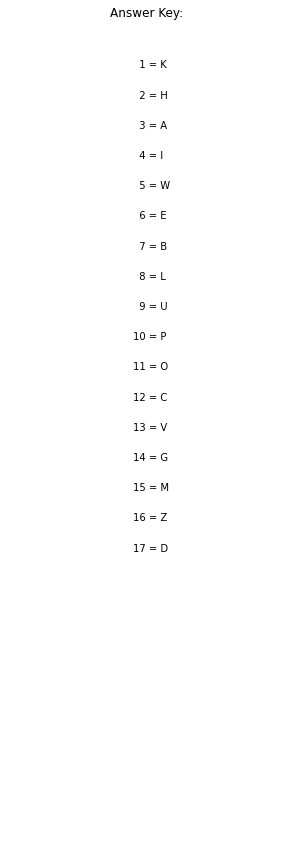

In [30]:
from matplotlib.backends.backend_pdf import PdfPages

plot1 = plate_plot()
plot2 = gal_multiplot()
plot3 = answer_key()

pp = PdfPages('Match_Gal_Print.pdf')
pp.savefig(plot1)
pp.savefig(plot2)
pp.savefig(plot3)
pp.close()